In [108]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost

In [109]:
 # reading csv file
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [110]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [111]:
#  checking for null value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [112]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [113]:
#  getiing curent year
now =datetime.datetime.now()
#  subtracting year from current year 
df['No_of_year'] = [(now.year -yr ) for yr in df['Year']]
#  droping Year columns
df.drop('Year', 1, inplace=True)  

In [114]:
df.Seller_Type.unique()
df.groupby(['Seller_Type']).count()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner,No_of_year
Seller_Type,,,,,,,,
Dealer,195,195,195,195,195,195,195,195
Individual,106,106,106,106,106,106,106,106


In [115]:
#  change Seller_Type (string to int)
sel_type = {'Dealer': 0,'Individual': 1}
df['Seller_Type'] = [sel_type.get(i) for i in df['Seller_Type']]  
  
#  change Transmission (string to int)  
trans = {'Manual':0, 'Automatic':1 }
df['Transmission'] = [trans.get(i) for i in df['Transmission']]

#  change Fuel_Type (string to int) 
fuel = {'Petrol':0, 'Diesel':1, 'CNG':2}
df['Fuel_Type'] = [fuel.get(i) for i in df['Fuel_Type']]


In [116]:
df.drop('Car_Name', axis = 1, inplace=True)

In [120]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_year
0,3.35,5.59,27000,0,0,0,0,6
1,4.75,9.54,43000,1,0,0,0,7
2,7.25,9.85,6900,0,0,0,0,3
3,2.85,4.15,5200,0,0,0,0,9
4,4.60,6.87,42450,1,0,0,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,1,0,0,0,4
297,4.00,5.90,60000,0,0,0,0,5
298,3.35,11.00,87934,0,0,0,0,11
299,11.50,12.50,9000,1,0,0,0,3


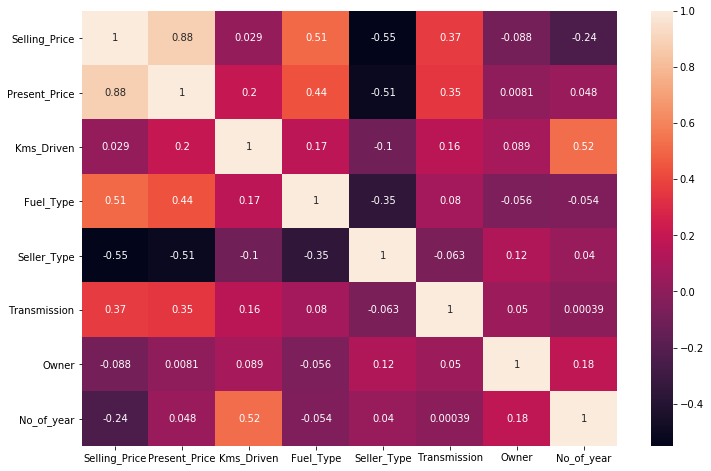

In [14]:
# creating correlation matrix for feature selection
corrmat = df.corr()
index = corrmat.index
plt.figure(figsize = (12, 8))
sns.heatmap(df[index].corr(), annot=True)

In [15]:
# 2 to last columns
X = df.iloc[:, 1:]
#  1 columns
y = df.iloc[:, 0]

In [16]:
# getting the important feature
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

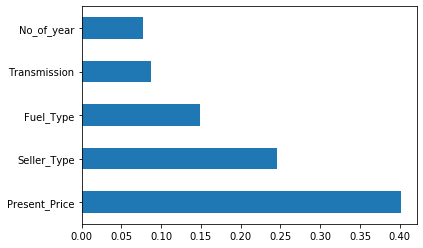

In [17]:
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
# top 5 feature
imp_feature.nlargest(5).plot(kind='barh')
plt.show()


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [19]:
model = RandomForestRegressor()

In [121]:
n_estimators = [int(i) for i in np.linspace(start=100, stop=1200, num=12)]

max_features = ['auto', 'sqrt']

max_depth = [ int(x) for x in np.linspace(5, 30 , 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10, 15, 20]


In [122]:
random_grid = {'n_estimators': n_estimators, 
               'max_features':max_features, 
               'max_depth': max_depth,
               'min_samples_split':min_samples_split, 
               'min_samples_leaf': min_samples_leaf }


In [123]:
r_model = RandomizedSearchCV(estimator=model,
                             param_distributions = random_grid, 
                             scoring='neg_mean_squared_error',
                             n_iter=1, cv=5, verbose=2, 
                             random_state=42, n_jobs=1
                            )


In [124]:
r_model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[00:25:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[00:25:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[00:25:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[00:25:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accur

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.5, gamma=0.3,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.25, max_delta_step=0,
                                          max_depth=5, min_child_weight=0.5,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=400, n...
                   iid='deprecated', n_iter=1, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features'

In [125]:
r_model.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 10}

In [126]:
r_model.best_score_

-4.008508506748896

In [26]:
predict = r_model.predict(X_test)

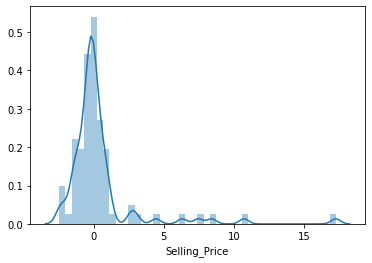

In [27]:
sns.distplot(y_test-predict)

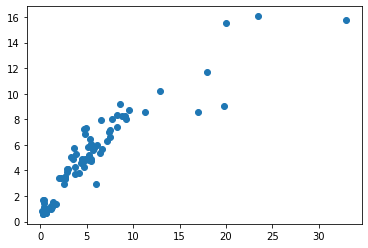

In [28]:
plt.scatter(y_test, predict)

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))


MAE: 1.2654204835886909
MSE: 7.4927338880690915
RMSE: 2.737285861591568


In [26]:
# creating model 
import pickle

file = open('car_price_predict.pkl', 'wb')

pickle.dump(r_model, file)

In [28]:
pip freeze > requirement.txt

Note: you may need to restart the kernel to use updated packages.


# Xg Boost Model

In [80]:
feature_selection = ExtraTreesRegressor()


In [89]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ .5, 1, 3, 5 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"   :   [100, 200, 300, 400, 500, 600]   
}

In [90]:
model = xgboost.XGBRegressor()

In [91]:
req = RandomizedSearchCV(estimator=model,
                             param_distributions = params, 
                             scoring='neg_mean_squared_error',
                             n_iter=1, cv=5, verbose=2, 
                             random_state=42, n_jobs=1
                            )

In [92]:
req.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=400, min_child_weight=0.5, max_depth=5, learning_rate=0.25, gamma=0.3, colsample_bytree=0.5 
[CV]  n_estimators=400, min_child_weight=0.5, max_depth=5, learning_rate=0.25, gamma=0.3, colsample_bytree=0.5, total=   0.1s
[CV] n_estimators=400, min_child_weight=0.5, max_depth=5, learning_rate=0.25, gamma=0.3, colsample_bytree=0.5 
[CV]  n_estimators=400, min_child_weight=0.5, max_depth=5, learning_rate=0.25, gamma=0.3, colsample_bytree=0.5, total=   0.1s
[CV] n_estimators=400, min_child_weight=0.5, max_depth=5, learning_rate=0.25, gamma=0.3, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=400, min_child_weight=0.5, max_depth=5, learning_rate=0.25, gamma=0.3, colsample_bytree=0.5, total=   0.1s
[CV] n_estimators=400, min_child_weight=0.5, max_depth=5, learning_rate=0.25, gamma=0.3, colsample_bytree=0.5 
[CV]  n_estimators=400, min_child_weight=0.5, max_depth=5, learning_rate=0.25, gamma=0.3, colsample_bytree=0.5, total=   0.1s
[CV] n_estimators=400, min_child_weight=0.5, max_depth=5, learning_rate=0.25, gamma=0.3, colsample_bytree=0.5 
[CV]  n_estimators=400, min_child_weight=0.5, max_depth=5, learning_rate=0.25, gamma=0.3, colsample_bytree=0.5, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma'

In [93]:
req.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=5,
             min_child_weight=0.5, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [94]:
req.best_params_

{'n_estimators': 400,
 'min_child_weight': 0.5,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [96]:
req.best_score_

-3.9220173341925824

In [98]:
model = xgboost.XGBRegressor(n_estimators = 400,
     min_child_weight = 0.5,
     max_depth = 5,
     learning_rate = 0.25,
     gamma = 0.3,
     colsample_bytree = 0.5)

In [99]:
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=5,
             min_child_weight=0.5, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [100]:
pred = req.predict(X_test)

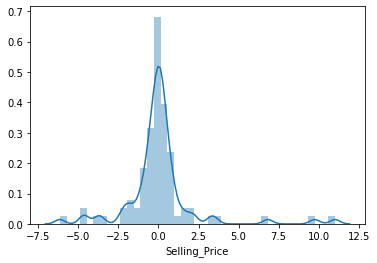

In [102]:
sns.distplot(y_test-pred)

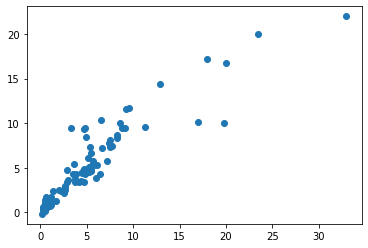

In [105]:
plt.scatter(y_test, pred)

In [107]:
import pickle

file = open('car_price_predict1.pkl', 'wb')

pickle.dump(r_model, file)